**Machine Learning**

**Assignment 02**
**part a**

Sean Fletcher



# <center> A Study of Factors related to Diabetic risk in Adults </center>

**<center> part a**

## Introduction


This notebook is a product of a Machine Learning class taught at the University of Southern Maine. The objective of this notebook is to demonstrate some proficiency in building predictive models. The section descriptions in this notebook's introduction include references for the websites and notebooks I used while creating it. The sections of this notebook are:


1. **Introduction**: This section. In addition to a general overview of this notebook, this section also includes a list of references and the import calls for all packages and libraries used in this notebook.
2. **Problem Definition**:  A simple description of what diabetes is and why diabetes is a serious health concern. (reference 1-5)
3. **Data Gathering**: All the data used in this notebook was gathered from the Centers for Disease Control and Prevention's National Health and Nutrition Examination Survey (references 6). Professor Bruce MacLeod's template for Lab 04 was used as an outline (reference 7).
4. **Data Cleaning and Wrangling**: In this section I prepare the data for further processing. I rename columns so while working with the data I can easily remember what each column is for. I remove data that will not be useful to the task (i.e. rows where ago < 20; this task is predicting diabetes risk in adults). I clean/restructure the data by recoding a few categorical columns. I remove rows with multiple null values, and also impute values into a few select columns. Lastly I combine two columns into a single columns "diabetes" that I will use as this notebook's target column. I references Professor MacLeod's extensively for this section (reference 7).


5. **Exploratory Data Analysis**: While conducting exploratory data analysis I found and fixed some issues in my labeling. I also found patterns between various attributes which led me to drop a column that I believe is redundant.(references 7, 8, 9, 10, 11)


6. **Data Modelling**: In this notebook I only look at 1 model, the Stochastic Gradient Descent Classifier. In the following notebooks I will be adding and comparing other models to each other.


7. **Prediction**: I use the Stochastic Gradient Descent Classifier to make predictions on the test data. It does not do a very good job.







**References:**

1. https://www.mayoclinic.org/diseases-conditions/diabetes/symptoms-causes/syc-20371444

2. https://en.wikipedia.org/wiki/Type_2_diabetes

3. https://en.wikipedia.org/wiki/Diabetes

4. Rahman MS, Hossain KS, Das S, Kundu S, Adegoke EO, Rahman MA, Hannan MA, Uddin MJ, Pang MG. Role of Insulin in Health and Disease: An Update. Int J Mol Sci. 2021 Jun 15;22(12):6403. doi: 10.3390/ijms22126403. PMID: 34203830; PMCID: PMC8232639

5. https://www.cdc.gov/diabetes/basics/diabetes.html#:~:text=Diabetes%20is%20a%20chronic%20(long,your%20pancreas%20to%20release%20insulin.


6. https://wwwn.cdc.gov/nchs/nhanes/default.aspx\

7. https://github.com/bruceMacLeod/COS475-575/blob/main/Lab/CVDPrediction.ipynb

8. https://github.com/bruceMacLeod/COS475-575/blob/main/Assignment/HypertensionV1.ipynb

9. https://www.cdc.gov/healthyweight/assessing/bmi/index.html#:~:text=Body%20Mass%20Index%20(BMI)%20is,or%20health%20of%20an%20individual.

10. Vilar-Compte M, Macinko J, Weitzman BC, Avendaño-Villela CM. Short relative leg length is associated with overweight and obesity in Mexican immigrant women. Int J Equity Health. 2019 Jul 3;18(1):103. doi: 10.1186/s12939-019-0988-0. PMID: 31269992; PMCID: PMC6609393.

11. (https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features#:~:text=The%20stronger%20the%20correlation%2C%20the,tend%20to%20change%20in%20unison.)

**Imports**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
# import tarfile
import urllib
import logging

from functools import reduce

# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

## Problem Definition

Diabetes is a general term for a group of diseases that cause sustained high blood sugar levels. This can happen either because the pancreas is not producing enough insulin (a hormone that controls blood sugar levels), or that the body isn't able to use the insulin that it makes. Over time, prolonged high blood sugar levels can cause very serious health concerns. These concerns include heart disease, vision loss, stroke, kidney disease and more. Diabetes, when untreated or poorly treated, accounts for around one and a half million deaths every year.


Diabetes tends to occur when an individual is obese and inactive. There are other factors that come into play though, including race, sex, genetic factors, and there is even a correlation between obesity and urbanization. While there are multiple types of diabetes, this notebook is going to focus only on type II diabetes, formally called adult-onset diabetes.


Currently there is no cure for type II diabetes, but losing weight if you are overweight, eating healthy foods, and becoming and staying active, can help.


In this notebook I will apply the tools of machine learning and data from the NHANES data sets to predict the factors that are associated with type II diabetes.







## Data Gathering

In [ ]:
def download_data(data_dir, file_list):

    if not os.path.exists(data_dir):
        os.makedirs(data_dir)

    for (year, data_file) in file_list:
        sub_dir = os.path.join(data_dir, year)
        if not os.path.exists(sub_dir):
            os.makedirs(sub_dir)
        url = 'http://wwwn.cdc.gov/Nchs/Nhanes/{0}/{1}.XPT'.format(year, data_file)
        file_name = os.path.join(sub_dir, data_file + '.XPT')
        if not os.path.exists(file_name):
            logging.info('Downloading: {}'.format(url))
            urllib.request.urlretrieve(url, file_name)
        else:
            logging.info('File exists: {}'.format(file_name))

def read_data_from_row(offset,ncols,col_list):
    df = pd.DataFrame()
    for i in range(ncols):
        filename = LOCAL_DATA_PATH + file_list[offset + i][0] + "/" + file_list[offset + i][1] + ".XPT"
        one_year_df = pd.read_sas(filename)
        df = pd.concat([df,one_year_df], axis=0)
    df = df.loc[:, col_list]
    return df



In [ ]:
file_list = [
        ('2017-2018', 'DEMO_J'),
        ('2017-2018', 'BMX_J') ,
        ('2017-2018', 'DIQ_J'),
        ('2017-2018', 'GLU_J'),
    ]

demo_cols = ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC2', 'INDHHIN2']
bmx_cols = ['SEQN', 'BMXHT', 'BMXWAIST', 'BMXBMI', 'BMXWT', 'BMXLEG']
quest_cols = ['SEQN', 'DIQ010']
lab_cols = ['SEQN', 'LBXGLU']


In [ ]:
LOCAL_DATA_PATH = os.path.join("datasets", "nhanes") + "/"

download_data(LOCAL_DATA_PATH, file_list)

In [ ]:
demo_df = read_data_from_row(0,1,demo_cols)
bmx_df = read_data_from_row(1,1,bmx_cols)
quest_df = read_data_from_row(2,1,quest_cols)
lab_df = read_data_from_row(3,1,lab_cols)

In [ ]:
# demo_df.head()
# bmx_df.head()
# quest_df.head()
# lab_df.head()

In [ ]:
dfList = [demo_df, bmx_df, quest_df, lab_df]
dbtc_df = reduce(lambda x,y: pd.merge(x,y, on='SEQN', how='outer'), dfList)
dbtc_df.head(20)

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC2,INDHHIN2,BMXHT,BMXWAIST,BMXBMI,BMXWT,BMXLEG,DIQ010,LBXGLU
0,93703.0,2.0,2.000000e+00,5.0,NaN,15.0,88.6,48.2,17.5,13.7,NaN,2.0,NaN
1,93704.0,1.0,2.000000e+00,3.0,NaN,15.0,94.2,50.0,15.7,13.9,NaN,2.0,NaN
2,93705.0,2.0,6.600000e+01,4.0,2.0,3.0,158.3,101.8,31.7,79.5,37.0,2.0,NaN
3,93706.0,1.0,1.800000e+01,5.0,NaN,NaN,175.7,79.3,21.5,66.3,46.6,2.0,NaN
4,93707.0,1.0,1.300000e+01,5.0,NaN,10.0,158.4,64.1,18.1,45.4,38.1,2.0,NaN
5,93708.0,2.0,6.600000e+01,5.0,1.0,6.0,150.2,88.2,23.7,53.5,31.8,3.0,122.0
6,93709.0,2.0,7.500000e+01,4.0,4.0,2.0,151.1,113.0,38.9,88.8,31.9,2.0,NaN
7,93710.0,2.0,5.397605e-79,3.0,NaN,15.0,NaN,NaN,NaN,10.2,NaN,NaN,NaN
8,93711.0,1.0,5.600000e+01,5.0,5.0,15.0,170.6,86.6,21.3,62.1,40.1,2.0,107.0
9,93712.0,1.0,1.800000e+01,1.0,NaN,4.0,172.8,72.0,19.7,58.9,44.5,2.0,NaN


## Data Cleaning and Wrangling:

**Renaming Columns**

I am renaming most of the columns to make the headers to something more meaningful

I'm leaving DIQ010 and LBXGLU as is. They will be merged into a separate
column called 'diabetes' soon

In [ ]:
# renaming the columns
dbtc_df.rename(columns={'SEQN': 'seqn', 'RIAGENDR': 'gender', 'RIDAGEYR':'age',
                        'RIDRETH1':'ethnicity', 'INDHHIN2':'income', 'DMDEDUC2':'education',
                        'BMXHT':'height', 'BMXWAIST':'waistcircum', 'BMXBMI':'bmi',
                        'BMXWT':'weight', 'BMXLEG':'leglength'}, inplace=True)

In [ ]:
# dbtc_df.head(20)
# dbtc_df.info()

**Next I remove all rows where 'age' is less than 20.**

Type II Diabetes primarily affects adults, so we will do our analysis on adults.

In [ ]:
# removing all rows where the age is under 20.
dbtc_df = dbtc_df[dbtc_df['age'] >= 20]

# checking
dbtc_df.info()  # well, there goes 3,685 rows...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5569 entries, 2 to 9253
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   seqn         5569 non-null   float64
 1   gender       5569 non-null   float64
 2   age          5569 non-null   float64
 3   ethnicity    5569 non-null   float64
 4   education    5569 non-null   float64
 5   income       5243 non-null   float64
 6   height       5185 non-null   float64
 7   waistcircum  4937 non-null   float64
 8   bmi          5175 non-null   float64
 9   weight       5185 non-null   float64
 10  leglength    4916 non-null   float64
 11  DIQ010       5569 non-null   float64
 12  LBXGLU       2435 non-null   float64
dtypes: float64(13)
memory usage: 609.1 KB


In [ ]:
# a function to count and find the percentage of null values and concatenat the results

def how_many_nulls(df):
  missing = pd.concat([df.isnull().sum(), 100*df.isnull().mean()], axis=1)
  missing.columns = ['count', 'percentage']
  return missing.sort_values(by='count', ascending=False)

In [ ]:
how_many_nulls(dbtc_df)

,count,percentage
LBXGLU,3134,56.275813
leglength,653,11.725624
waistcircum,632,11.348537
bmi,394,7.074879
height,384,6.895313
weight,384,6.895313
income,326,5.853834
seqn,0,0.000000
gender,0,0.000000
age,0,0.000000


**Here I am removing the rows with NaN values in the 'bmi' column.**


There are two main reasons for this choice:


1) Bmi, when high, is known to affect a person's risk of getting Type II Diabetes. Because of this correlation I do not want to impute data into that column.


2) After removing NaN values from a few different columns I realized that the same rows that have NaN values for 'bmi' also have NaN values for 'height' and 'weight'. This means that I am removing rows that have multiple NaN values, not just one NaN value for 'bmi'.





In [ ]:
# filering out the rows with NaN values in the 'bmi' column from the dataset
dbtc_df = dbtc_df[dbtc_df['bmi'].notna()].reset_index(drop=True)

In [ ]:
how_many_nulls(dbtc_df)

,count,percentage
LBXGLU,2781,53.739130
leglength,267,5.159420
income,258,4.985507
waistcircum,247,4.772947
seqn,0,0.000000
gender,0,0.000000
age,0,0.000000
ethnicity,0,0.000000
education,0,0.000000
height,0,0.000000


**Imputing Values**


The remaining rows with NaN values (except 'LBXGLU', but I'll get to that next) are 'leglength', 'waistcircum', and 'income'.


**I impute 'leglength' and 'wastcircum' using the median.** The median will provide a value representing the central tendency. I choose median over mean in case the column is slightly skewed. I choose median over mode because the values are ranges measured in cm up to one decimal point. With so many values it is hard to predict whether the mode would be 'central' or not.


**I impute 'income' using mode.** I chose mode because the 'income' values are categorical. I did not choose forward fill because the data is not sequential.







In [ ]:
# imputing 'leglength' and 'waistcircum' by median
dbtc_df[['leglength', 'waistcircum']] = dbtc_df[['leglength', 'waistcircum']].fillna(dbtc_df[['leglength', 'waistcircum']].median())

In [ ]:
# imputing 'income' by mode
dbtc_df['income'].fillna(dbtc_df['income'].mode()[0], inplace=True)

In [ ]:
how_many_nulls(dbtc_df)

,count,percentage
LBXGLU,2781,53.73913
seqn,0,0.00000
gender,0,0.00000
age,0,0.00000
ethnicity,0,0.00000
education,0,0.00000
income,0,0.00000
height,0,0.00000
waistcircum,0,0.00000
bmi,0,0.00000


**Setting up our target column**


Here I am taking the data from the questionnaire and from the fasting glucose labs and setting up a target "diabetes" column. If an individual's glucose levels are greater than 125, if a doctor told the person they have diabetes, or if a doctor told a person they are "borderline" for diabetes, they will be coded as 1, if not, they will be coded as 0.




-----




*note to Prof. MacLeod: I understand the assignment directions do not say to include DIQ010 == 3 as a 1 in the target 'diabetes' column. I however think it is a good idea and am doing it. I think it's a good idea because a person who is "borderline" for diabetes will most likely have many risk factors associated with diabetes, and those risk factors are what our model is being trained to find.*





In [ ]:
def have_diabetes(DIQ010, LXGLU):
    if ((DIQ010 == 1) or (DIQ010 == 3) or (LXGLU > 125)):
        return 1
    else:
        return 0


In [ ]:
def diabetes_add_attributes(df):
    if ('DIQ010' in df.columns) &  ('LBXGLU' in df.columns):
       df['diabetes'] = df.apply(lambda x: have_diabetes(x['DIQ010'], x['LBXGLU']), axis=1)

In [ ]:
# after creating the new target column I drop the two input columns.
def drop_columns(df):
        if ('DIQ010' in df.columns) &  ('LBXGLU' in df.columns):
            df = df.drop(columns=['DIQ010', 'LBXGLU'], axis=1)
        return df

In [ ]:
diabetes_add_attributes(dbtc_df)
dbtc_df = drop_columns(dbtc_df)

In [ ]:
dbtc_df.drop('seqn', axis=1, inplace=True)

In [ ]:
dbtc_df.drop('bmi', axis=1, inplace=True)  # please see "Summerization of Exploratory Data Analysis insights" for explination

In [ ]:
how_many_nulls(dbtc_df)

,count,percentage
gender,0,0.0
age,0,0.0
ethnicity,0,0.0
education,0,0.0
income,0,0.0
height,0,0.0
waistcircum,0,0.0
weight,0,0.0
leglength,0,0.0
diabetes,0,0.0


In [ ]:
dbtc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5175 entries, 0 to 5174
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       5175 non-null   float64
 1   age          5175 non-null   float64
 2   ethnicity    5175 non-null   float64
 3   education    5175 non-null   float64
 4   income       5175 non-null   float64
 5   height       5175 non-null   float64
 6   waistcircum  5175 non-null   float64
 7   weight       5175 non-null   float64
 8   leglength    5175 non-null   float64
 9   diabetes     5175 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 404.4 KB


In [ ]:
dbtc_df.shape

(5175, 10)

**Recoding Values**

Here I recode 'gender', 'income' and 'education'

In [ ]:
# find the mode of 'education'
print(dbtc_df['education'].mode())  # the mode is 4.0

0    4.0
Name: education, dtype: float64


In [ ]:
def recode_values(df):
    # replace the 2(female) from the original dataset to 0,
    # now the values are 0(female) and 1(male)
    df['gender'].replace({2: 0}, inplace=True)

    # replace 13(under $20,000) by 4($15,000 to $19,999)
    # recode 14(75,000 to 99,999) to 11
    # recode 15(100,000 and over) to 12
    # replace 12(over $20,000), 77(refused) and 99(don't know) by mode 6($25,000 to $34,999).
    df['income'].replace({13: 4, 12: 6, 77: 6, 99: 6, 14: 11, 15: 12}, inplace=True)

    # replace 7(Refused) and 9(Don't Know) with 4(Some college or AA degree)
    # 4 is the mode
    df['education'].replace({7: 4, 9: 4}, inplace=True)

    return df

In [ ]:
dbtc_df = recode_values(dbtc_df)

In [ ]:
dbtc_df.head(2)

,gender,age,ethnicity,education,income,height,waistcircum,weight,leglength,diabetes
0,0.0,66.0,4.0,2.0,3.0,158.3,101.8,79.5,37.0,0
1,0.0,66.0,5.0,1.0,6.0,150.2,88.2,53.5,31.8,1


In [ ]:
dbtc_df.shape

(5175, 10)

**Splitting the data into train and test**

In [ ]:
y = dbtc_df['diabetes']
X = dbtc_df.drop('diabetes',axis=1)

In [ ]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train,  X_val, y_train, y_val = train_test_split(X_train,y_train,  test_size=0.1, random_state=42)

# I don't actually use the X_val and y_val slices of data because I use the cross validation process. So I'm commenting the above line of code out

In [ ]:
#confirming the ratios of train, test and validation sets for X
print('Percent heldout for training:', round(100*(len(X_train)/len(dbtc_df)),0),'%')
# print('Percent heldout for validation', round(100*(len(X_val)/len(dbtc_df)),0),'%')
print('Percent heldout for testing:', round(100*(len(X_test)/len(dbtc_df)),0),'%')

Percent heldout for training: 80.0 %
Percent heldout for testing: 20.0 %


In [ ]:
#confirming the ratios of train, test and validation sets for y
print('Percent heldout for training:', round(100*(len(y_train)/len(dbtc_df)),0),'%')
# print('Percent heldout for validation:', round(100*(len(y_val)/len(dbtc_df)),0),'%')
print('Percent heldout for testing:', round(100*(len(y_test)/len(dbtc_df)),0),'%')

Percent heldout for training: 80.0 %
Percent heldout for testing: 20.0 %


**Creating a pipeline**

In [ ]:
dbtc_df.head(2)

,gender,age,ethnicity,education,income,height,waistcircum,weight,leglength,diabetes
0,0.0,66.0,4.0,2.0,3.0,158.3,101.8,79.5,37.0,0
1,0.0,66.0,5.0,1.0,6.0,150.2,88.2,53.5,31.8,1


In [ ]:
numerical_attributes = ['age', 'income', 'waistcircum', 'weight', 'leglength', 'education', 'height']
categorical_attributes = ['gender', 'ethnicity']


Education is ordinal and categorical, it is NOT numerical.




It is NOT numerical because 1-(less than 9th grade) plus 4-(some college) does not equal 5(college graduate). I am still choosing to use it numerically because it is coded ordinally (0-5, with 0 being the least amount of formal education and 5 being college graduates). I am assuming the education data is important because of its ordinal relationship. If I were to one-hot-encode this data, the ordinal relationships would be lost, and if for example their were a high prevalence of diabetes in individuals who are coded as a 4 and 5, and less diabetes in individuals who were coded as a 1, the one-hot encoding would make it seem as if getting a high school diploma and only a high school diploma was a way to prevent diabetes. The algorithm would miss the correlation between the amount of education an individual received and diabetes.


And also, you told us to not one-hot-encode this in the assignment write-up.





In [ ]:
num_pipeline = Pipeline([('std_scaler', StandardScaler())])
cat_pipeline = Pipeline([('one_hot', OneHotEncoder())])

In [ ]:
the_full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_attributes),
        ("cat", cat_pipeline, categorical_attributes),
        ])

# testing out the new pipeline to make sure it works
dbtc_prepared = the_full_pipeline.fit_transform(X_train)

In [ ]:
dbtc_prepared.shape

(4140, 14)

In [ ]:
#turning the numpy array into a panda dataframe so I can view it in a familiar way
new_and_clean_df = pd.DataFrame(data=dbtc_prepared)

In [ ]:
dbtc_df.head(2) # pre pipeline data for reference

,gender,age,ethnicity,education,income,height,waistcircum,weight,leglength,diabetes
0,0.0,66.0,4.0,2.0,3.0,158.3,101.8,79.5,37.0,0
1,0.0,66.0,5.0,1.0,6.0,150.2,88.2,53.5,31.8,1


In [ ]:
new_and_clean_df.head(2) # post pipeline data. It seems to have worked!!! I'll use this pipeline later when I start training models

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.848918,-0.876837,1.036866,0.877034,0.396395,-0.442581,0.955219,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.450872,-0.567101,0.465341,0.486937,-0.187778,0.387634,0.776705,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Exploratory Data Analysis

**Summarization of Exploratory Data Analysis insights:**


* When viewing the histograms I saw that I should recode more income columns. I changed the 14s(75,000 to 99,999) to 10s and 15s(100,000 and over) to 11s. Now the ordinal categories rise incrementally. When I originally recoded 12 to the mode and 13 to 4 there was a large gap with no values for 10, 11, 12, and 13. Now that I recoded 14->11; 15->12, the data is coded ordinally with even increments.


* When viewing the barplots of the mean of grouped features I noticed that there seems to be no correlation with diabetes and height. This led me to decide to look at a correlation heatmap.


* the correlations heatmap showed bmi, weight, and height as highly correlated. This makes sense because bmi is calculated by dividing a person's weight by the square of their height (reference 9). Since there seems to be no correlation between a person's height and diabetes, and height, weight and bmi are highly correlated, I have decided to drop the BMI variable. The reason I am dropping correlated variables at all is because of the idea that a model is looking at independant variables in order to learn to predict the dependent variables. If two or more of the independent variables are highly correlated then the model would have a harder time estimating the relationship between one of those independent variables and the dependent variable. This idea came from a stack exchange discussion (reference 11); while there are no sources cited, it just made sense to me so I'm incorporating it.


* The heatmap also showed a very high correlation between height and upper-leg-length. I am keeping upper-leg-length as a variable because it is slightly negatively correlated with the diabetes column. This negative correlation confused me at first, but after a little research (reference 10) I learned that stunted leg lengths (limb lengths) relative to a person's stature and torso, can be a sign of prolonged malnutrition. The CDC measures upper-leg-length in order to find discrepancies in an individual's leg lengths which can affect balance, and therefore risk of falling. But this data can now be used to track other health concerns. COOL!









In [ ]:
y_train.value_counts(normalize=True)  # checking the ratio of 0s:1s (0s meaning NO DIABETES; 1s meaning YES DIABETES)

0    0.794686
1    0.205314
Name: diabetes, dtype: float64

In [ ]:
# y_val.value_counts(normalize=True)

Our data is highly imbalanced with about 20% of individuals with Diabetes risk.


We may have to take this into account while modeling.

In [ ]:
Xy_train = X_train.copy()
Xy_train['diabetes'] = y_train
Xy_grouped = Xy_train.groupby('diabetes')[['age', 'waistcircum',
                                   'height', 'weight', 'leglength']].mean().reset_index()
Xy_grouped

,diabetes,age,waistcircum,height,weight,leglength
0,0,48.315502,98.633009,166.410578,81.122219,39.282158
1,1,61.736471,107.952471,165.717765,89.248235,37.942824


In [ ]:
#def a function to plot barplots for the mean of grouped features
def barplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.3, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        barlist=ax.bar(x = 'diabetes', height = col, data=Xy_grouped)
        barlist[0].set_color('steelblue')  # the red an green from Lab4 was too Christmasy for me
        barlist[1].set_color('darkred')
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['No', 'Yes'], fontsize=14, color='black')
        ax.set_xlabel('CVD risk',fontsize=14, color='black')
        ax.set_ylabel(col, fontsize=14, color='black')
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [ ]:
features = [i for i in Xy_grouped.columns if i not in ['diabetes']]

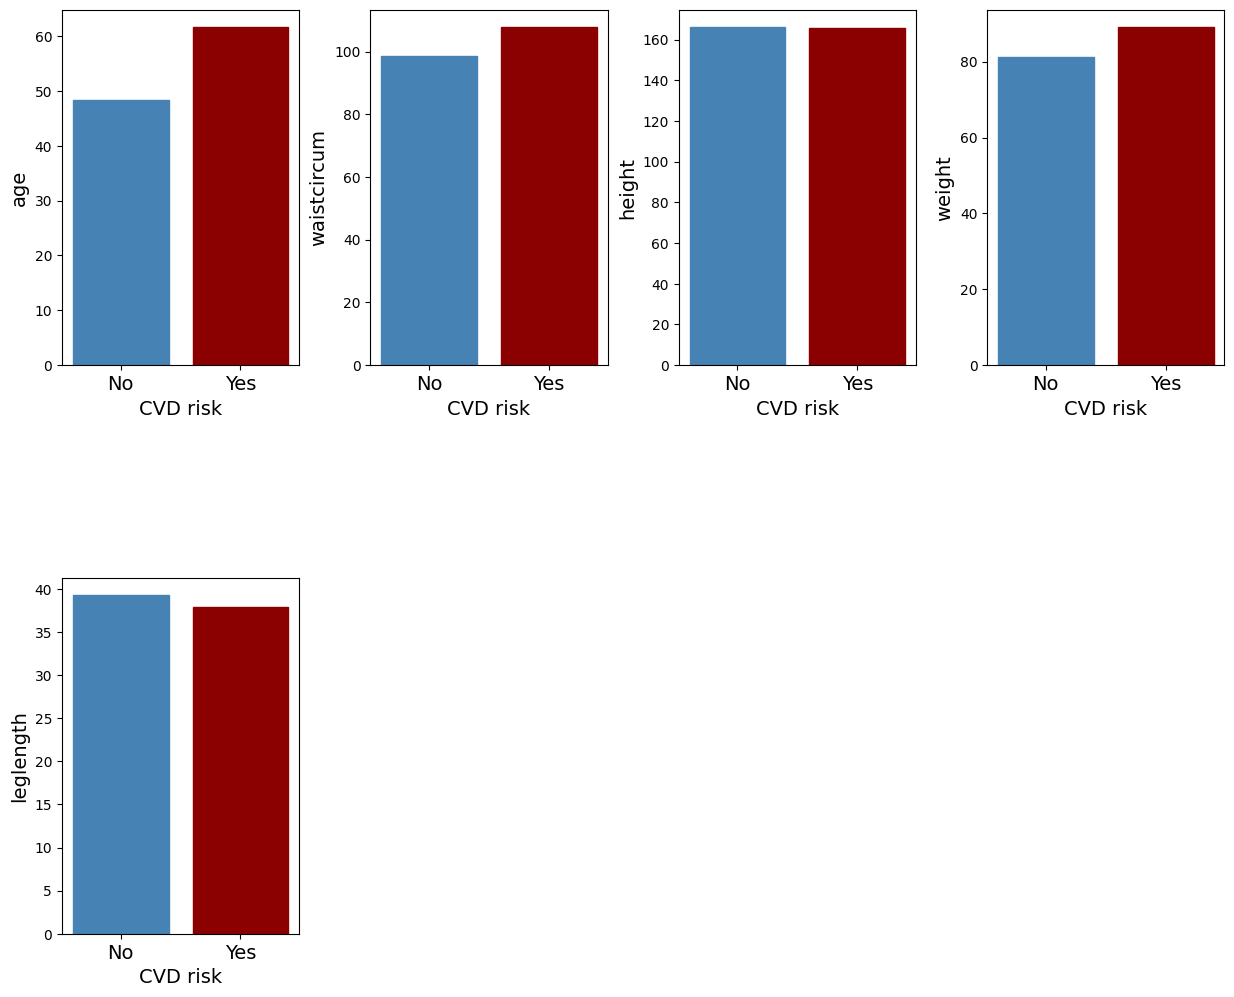

In [ ]:
barplots(features, ncol=4, figsize=(15, 12))

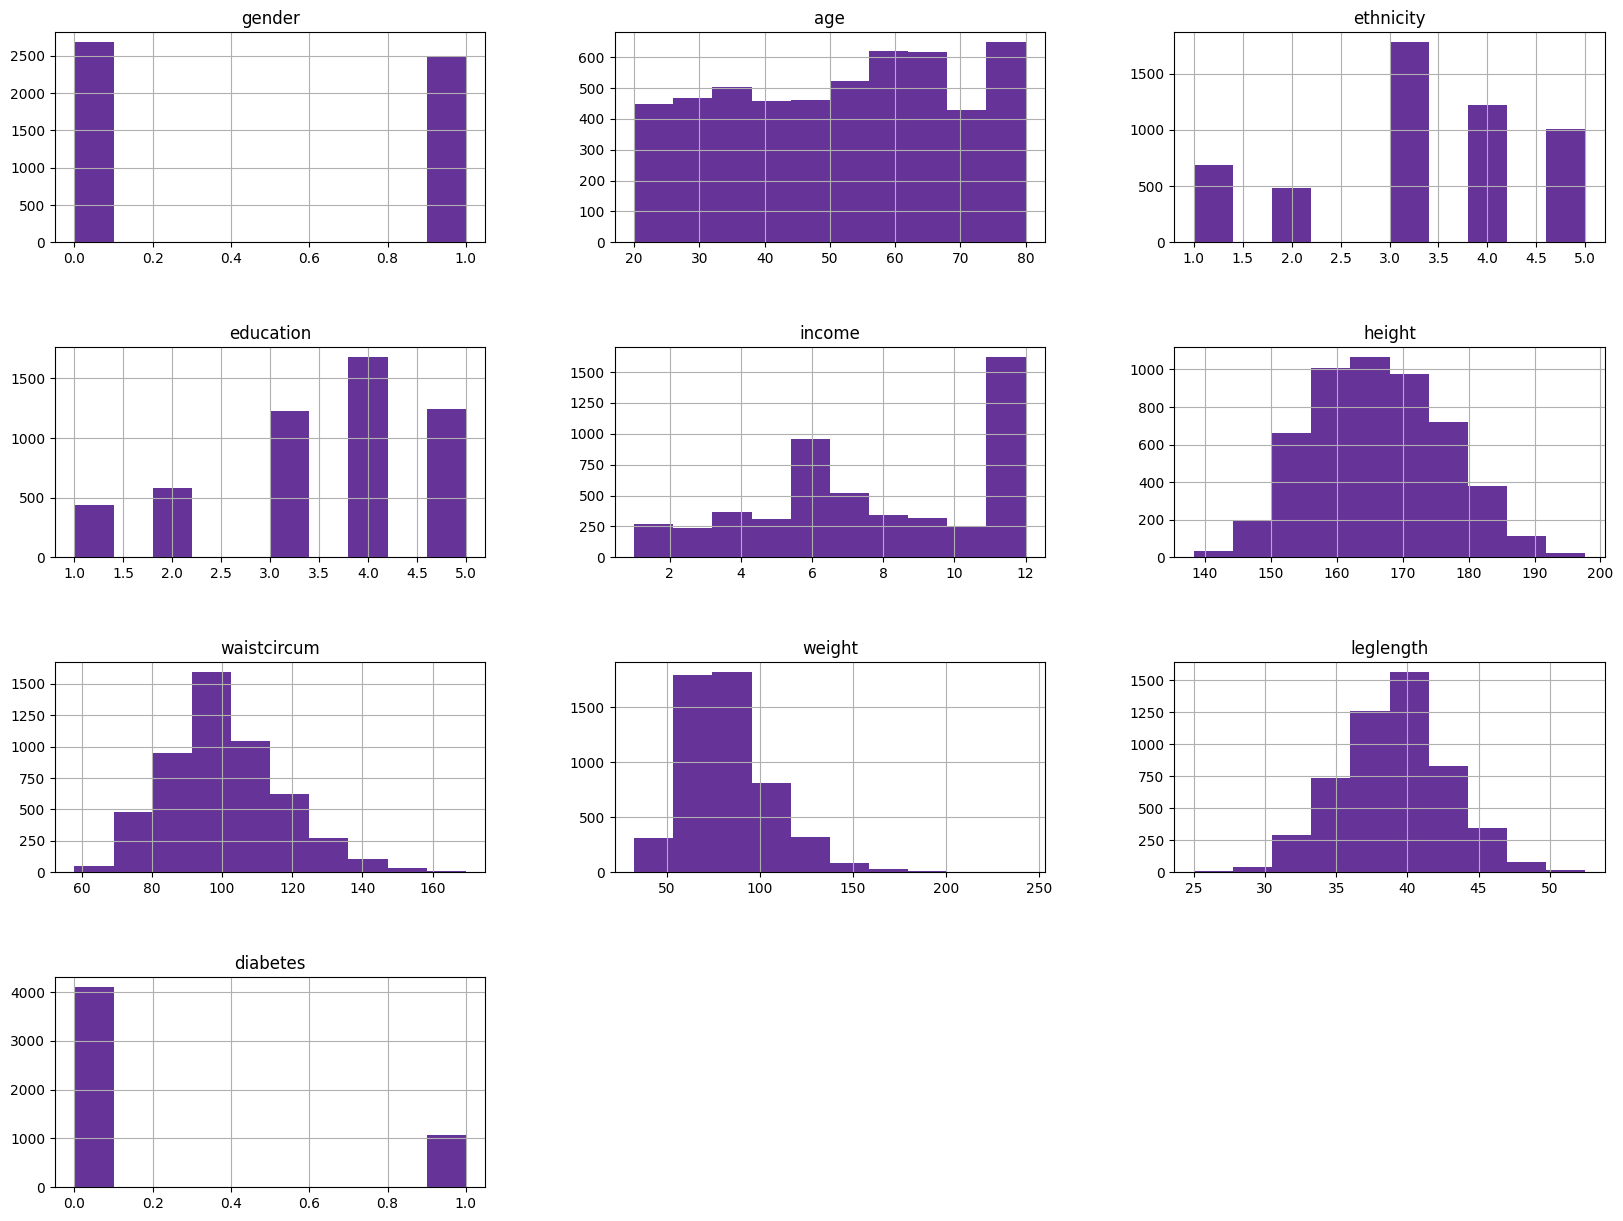

In [ ]:
# histograms showing attribute distributions
dbtc_df.hist(figsize=(20, 15), color='rebeccapurple')
plt.subplots_adjust(hspace=0.5)
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.show()

In [ ]:
corr_matrix = Xy_train.corr()


In [ ]:
corr_matrix["diabetes"].sort_values(ascending=False)

diabetes       1.000000
age            0.308267
waistcircum    0.228879
weight         0.143869
gender         0.049473
ethnicity      0.010613
height        -0.027754
income        -0.035429
education     -0.079001
leglength     -0.143653
Name: diabetes, dtype: float64

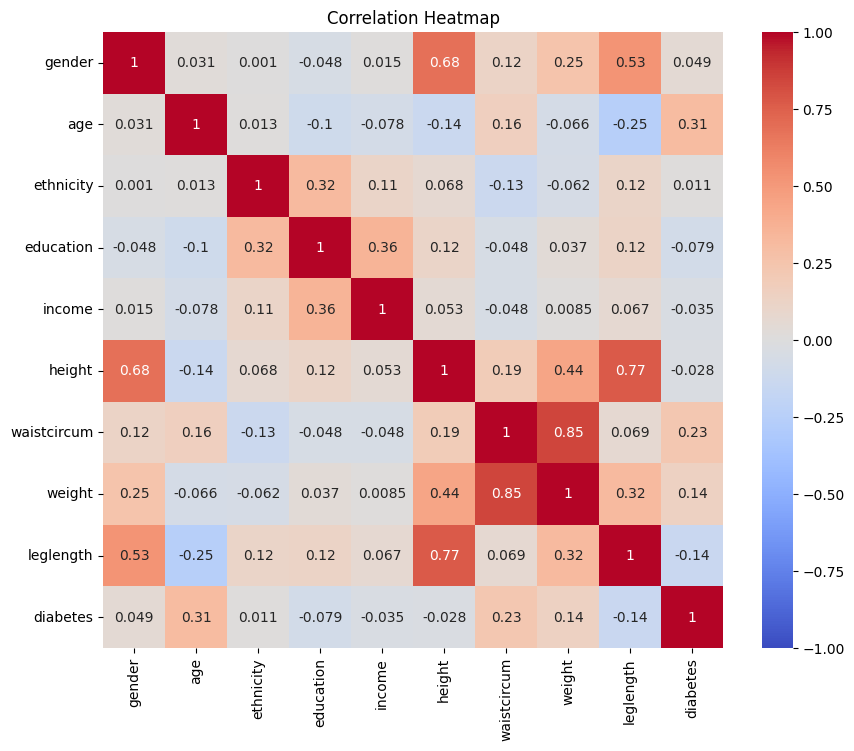

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## Data Modeling

* **Training a model**

In [ ]:
dbtc_prepared.shape

(4140, 14)

In [ ]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(dbtc_prepared, y_train)

SGDClassifier(random_state=42)

* **Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, dbtc_prepared, y_train, cv=6, scoring="accuracy")

array([0.7826087 , 0.80289855, 0.79130435, 0.7942029 , 0.79565217,
       0.79710145])

The scores above (0.79227053, 0.76811594, 0.79549114, 0.79066023, 0.79066023, 0.78904992]) show the accuracy of the model on each of the 6 folds (cv=6) in the cross-validation process. These scores can help see how the model performs across different subsets of the same data. It can give you an idea of the model's potential consistency.

**The accuracy is not looking good.** The model could have gotten a 79 percent accuracy by simply predicting "0" for each instance...

* **Confusion Matrix**

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, dbtc_prepared, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[3079,  211],
       [ 681,  169]])

This is a confusion matrix showing True Negative, False positive, False Negative, and true positive. The top row are all the instances predicted as negative, the bottom row are all instances predicted to be positive. The first column are the actual negative instances, and the right column are the actual positive instances. These numbers are used to compute the precision, recall, and f1 scores below.





* **Precision, Recall, F1**

In [ ]:
# because the confusion matrix wasn't in the order I expected it to be in, I did this out the long way too

confusion_matrix_train = [[3079,  211], [ 681,  169]]
TP = confusion_matrix_train[1][1]
FP = confusion_matrix_train[0][1]
FN = confusion_matrix_train[1][0]


precision = TP / (TP + FP)
recall = TP / (TP + FN)


f1 = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.44473684210526315
Recall: 0.1988235294117647
F1-Score: 0.27479674796747966


In [ ]:
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.44473684210526315
Recall: 0.1988235294117647
F1-Score: 0.27479674796747966


Precision is: out of all the positive predictions, how many instances are actually positive.


Recall is: out of all the positive instances, how many of those instances are predicted to be positive.


The F1-score is a number representing the balance between precision and recall. If precision and recall are both 100% then F1 would be 1. If either precision or recall (or both) are zero, then f1 will be 0. The higher the f1, generally the better the model is, given the data.





* **Graphs**

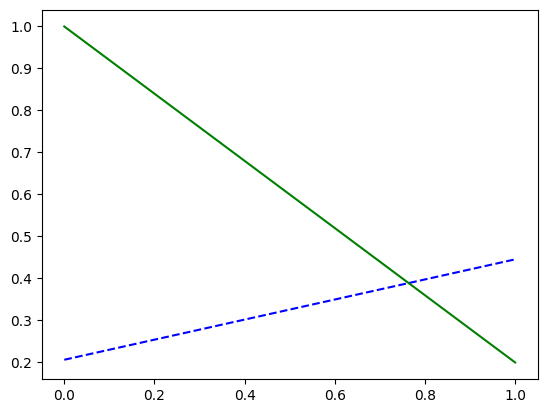

In [ ]:
# precision and recall graphed against threshold
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


This graph shows the precision scores and recall scores graphed against the thresholds. I don't understand why precision (the blue dashed line) never reaches 1 on the y axis... These lines are also not curved. This makes me think that I'm doing something wrong. It could also just be because the model is so terrible that this is what it looks like. I'm going to continue with parts b, c, etc and maybe come back and fix this later if I learn what happened.





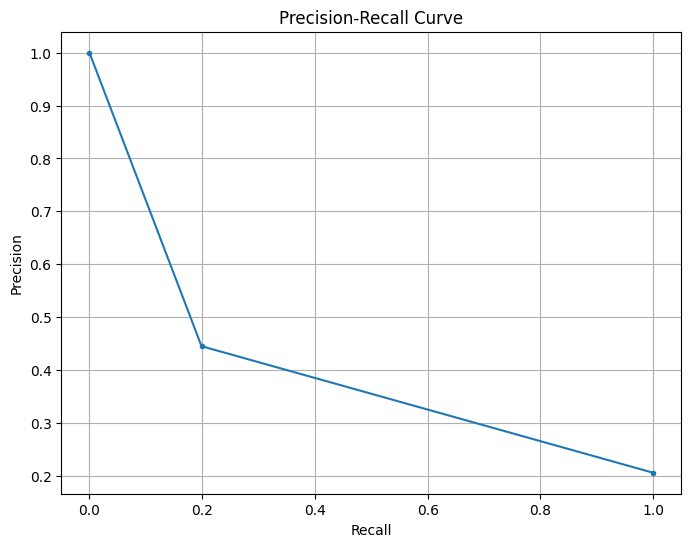

In [ ]:
# precision agaisnt recall
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

This graph is also not very curve-like. But it shows how as precision goes down, recall goes up.

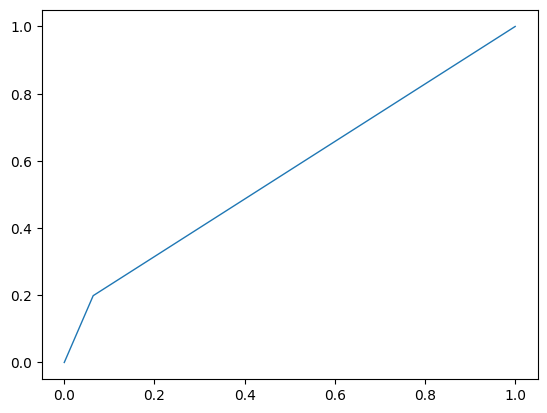

In [ ]:
# ROC curve

fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=1, label=label)

plot_roc_curve(fpr, tpr)
plt.show()

This is the ROC graph. It also says that the model is terrible. A purely random would have a ROC curve that looks like a straight line going from 0,0 to 1,1. This "curve" is not far off from that.

* **ROC vs. PR**

Generally, the rule is that when the dataset is unbalanced, use the Precision-Recall graph, because the ROC curve can make your model seem better than it really is. The reason behind this is interesting.


The ROC curve is ratio-based, and the ratios used are the True Positive rate (proportion of true positive predictions relative to all positive instances) and the False Positive rate (the proportion of false positive predictions (when the instance is actually negative) and all actual negative instances). This setup is columnar, using the columns in the confusion matrix from above. Because each of the ratios are calculated only within the column, then the ROC curve is not going to change when the positive instances vs. negative instances balance in the data changes. ROC doesn't care about that. The ratios are comparing how positive instances are predicted and how negative instances are predicted. This means that the ROC curve is going to look better if the ratio of correctly predicted negative cases is higher. In the case of our data, around 79% of our data has a negative label, and while the model might be fairly good at predicting negative labels, we don't actually care about that. We're looking for correct positive labels; we want to know who is at risk for Diabetes.


The Precision-Recall graphs however DOES NOT take into account the "true negatives" at all.


So because our dataset is skewed, we use the PR curve. If our dataset was more balanced we could use ROC.





## Predictions

In [ ]:
# preprocessing the test data with the pipeline
dbtc_prepared_test = the_full_pipeline.fit_transform(X_test)


In [ ]:
# testing the model
the_predictions = sgd_clf.predict(dbtc_prepared_test)

In [ ]:
# confusion matrix
confusion_matrix(y_test, the_predictions)

array([[758,  48],
       [187,  42]])

In [ ]:
precision_test = precision_score(y_test, the_predictions)
recall_test = recall_score(y_test, the_predictions)
f1_test = f1_score(y_test, the_predictions)

print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

Precision: 0.4666666666666667
Recall: 0.18340611353711792
F1-Score: 0.2633228840125392


training data:

* Precision: 0.44473684210526315
* Recall: 0.1988235294117647
* F1-Score: 0.27479674796747966

test data:
* Precision: 0.4666666666666667
* Recall: 0.18340611353711792
* F1-Score: 0.2633228840125392

* **Evaluation**

Well, it seems like the model did similarly on the test data as it did on the training data. Let's add more data for notebook b and see how we do!!!

## playing with thresholds

**(I wrote the following code in notebook_b, and then I came back here to notebook_a to play around with it a little bit and get it to work.)**

---

my write up for the following code can be found in notebook_b

In [ ]:
raw_scores = sgd_clf.decision_function(dbtc_prepared_test)


In [ ]:
custom_thresholds = [.05, .1, .15, .2, .25, .3, .35, .4, .45, .55, .6, .65, .7, .75, .8, .85, .9, .95]

custom_y_scores_list = []

for i in custom_thresholds:
  y_custom_pred = (raw_scores > i).astype(int)
  custom_y_scores_list.append((i, y_custom_pred))



In [ ]:
for j in custom_y_scores_list:
  cnfmtrx = confusion_matrix(y_test, j[1])
  prcsn = precision_score(y_test, j[1])
  rcll = recall_score(y_test, j[1])
  fone = f1_score(y_test, j[1])
  print("********************")
  print("Threshold: ", j[0])
  print("confusion matrix:")
  print(cnfmtrx)
  print("precision: ", prcsn)
  print("recall: ", rcll)
  print("f1: ", fone)
